In [5]:
# this function was exported to allow multiprocessing.
import sys

import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt


plt.style.use('seaborn-v0_8-paper')

from itertools import chain

sys.path.append('../../utils')
import data_paths
from traffic_counts import TrafficCounts
from hbefa_hot_emissions import HbefaHotEmissions

# Import Data
- VISUM link data (cut to Munich Boarders)
- Initilize counting data object
- Initialize HBEFA emission calculator object

In [2]:
# import data
# import visum model
visum_links = gpd.read_file(data_paths.VISUM_FOLDER_PATH + 'visum_links.gpkg')
boarders = gpd.read_file(data_paths.MUNICH_BOARDERS_FILE).to_crs(25832)
visum = gpd.clip(visum_links, boarders)
visum = visum.explode(ignore_index=True) # convert multipolygons to polygons

visum = visum.reset_index(drop = True).reset_index() # reset index for calculation
visum['road_length'] = visum['geometry'].length # add road length to visum dict

# initialize traffic cycles
#cycles = TrafficCounts()
# initialize HBEFA emission factors
#hbefa = HbefaHotEmissions()

# Notebook Function

In [3]:
visum['VKT_SUM'] = visum['dtv_SUM'] * visum['road_length']* 1e-3

In [12]:
vkt_sum = pd.DataFrame(visum.groupby('road_type')['VKT_SUM'].sum())
vkt_sum = vkt_sum.drop('TrunkRoad/Primary-National')

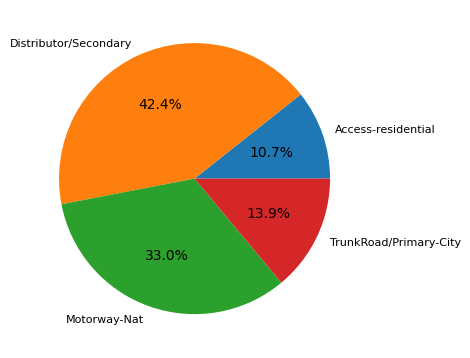

In [14]:
plt.pie(vkt_sum['VKT_SUM'], labels = vkt_sum.index, autopct='%1.1f%%')
plt.show()

In [15]:
from matplotlib.gridspec import GridSpec

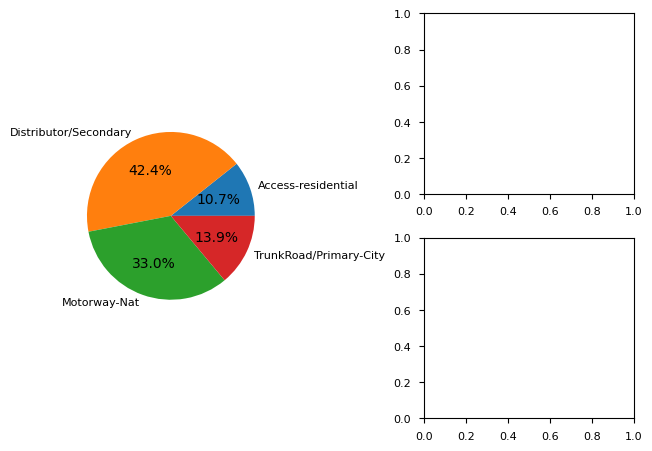

In [24]:
fig = plt.figure(layout="constrained")
gs = GridSpec(2,2, figure=fig)
ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,1])

ax1.pie(vkt_sum['VKT_SUM'], labels = vkt_sum.index, autopct='%1.1f%%')

plt.show()